* Họ và tên: Nguyễn Tuấn Anh
* MSSV: 21520142
* Lớp: CS331.O11.KHTN
* Bài tập: Baitap01
* Ngày thực hiện: 25-09-2023

In [1]:
import torch
import torchvision
from torchvision import datasets
from imutils import paths
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
import cv2
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#download dataset
data_path='./'
dataset = datasets.Caltech101(data_path, download=True)

131740031it [00:00, 170593848.14it/s]


Extracting ./caltech101/101_ObjectCategories.tar.gz to ./caltech101


14028800it [00:00, 168900991.90it/s]


Extracting ./caltech101/Annotations.tar to ./caltech101


In [5]:
#Extract Feature Histogram
image_paths = list(paths.list_images('./caltech101'))

data = []
labels = []
for img_path in tqdm(image_paths):
    label = img_path.split(os.path.sep)[-2]
    if label == "BACKGROUND_Google":
        continue
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    size = img.shape[0]*img.shape[1]
    hist = hist/size

    data.append(hist)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)

100%|██████████| 9144/9144 [00:07<00:00, 1203.05it/s]


In [6]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(f'Total Number of Classes: {len(lb.classes_)}')

Total Number of Classes: 101


In [7]:
#chia train, val, test
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

x_train = x_train.reshape(len(x_train), 256)
x_val = x_val.reshape(len(x_val), 256)
x_test = x_test.reshape(len(x_test), 256)
print(len(x_train))
print(len(x_val))
print(len(x_test))


5206
1735
1736


# Yêu cầu 1: Áp dụng thuật toán KNN, tính Accuracy trên tập val và test với các giá trị k lần lượt:1,2,3,4,5

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
best_score_val = 0
best_k_val = 0
best_score_test = 0
best_k_test = 0
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score_val = knn.score(x_val, y_val)
    score_test = knn.score(x_test, y_test)

    if score_val > best_score_val:
        best_score_val = score_val
        best_k_val = i
    if score_test > best_score_test:
        best_score_test = score_test
        best_k_test = i
    print(f'KNN with k={i}:')
    print(f'        accuracy in val: {score_val}')
    print(f'        accuracy in test: {score_test}')
print(f"Best score in val = {best_score_val} with k = {best_k_val}")
print(f"Best score in test = {best_score_test} with k = {best_k_test}")

KNN with k=1:
        accuracy in val: 0.21729106628242076
        accuracy in test: 0.23847926267281105
KNN with k=2:
        accuracy in val: 0.21498559077809798
        accuracy in test: 0.24193548387096775
KNN with k=3:
        accuracy in val: 0.22651296829971182
        accuracy in test: 0.24942396313364054
KNN with k=4:
        accuracy in val: 0.23285302593659943
        accuracy in test: 0.25518433179723504
KNN with k=5:
        accuracy in val: 0.23631123919308358
        accuracy in test: 0.25806451612903225
Best score in val = 0.23631123919308358 with k = 5
Best score in test = 0.25806451612903225 with k = 5


# Yêu cầu 2:
## Áp dụng thuật toán SVC (với tham số C=1)
## Tính Accuracy cho tập test
## Tính Precision của từng lớp (class)

In [15]:
from sklearn.svm import SVC

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [19]:
#khởi tạo model SVC với C=1
svc = SVC(C=1)

In [20]:
svc.fit(x_train, y_train)

SVC(C=1)

In [24]:
y_test_pred = svc.predict(x_test)

In [30]:
print(f'Accuracy in test: {accuracy_score(y_test_pred, y_test)}')

Accuracy in test: 0.2730414746543779


In [32]:
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.49      0.11      0.19       359
           1       0.72      0.16      0.26       421
           2       0.76      0.31      0.44       101
           3       0.84      0.44      0.58       325
           4       0.00      0.00      0.00         6
           5       0.88      0.51      0.65       265
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.11      0.25      0.15         4
          12       0.00      0.00      0.00         4
          13       0.22      0.14      0.17        28
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Yêu cầu 3:
## Áp dụng thuật toán SVC (với tham số C=1)
### Sử dụng chiến lược 1 vs 1:
* Tính Accuracy cho tập test
* Tính số support vector
* Tính và hiển thị ma trận Confusion

In [33]:
svc_one_vs_one = SVC(C=1, decision_function_shape='ovo')

In [35]:
svc_one_vs_one.fit(x_train, y_train)

SVC(C=1, decision_function_shape='ovo')

In [37]:
y_test_ovo_pred = svc_one_vs_one.predict(x_test)

In [38]:
print(f'Accuracy in test: {accuracy_score(y_test_ovo_pred, y_test)}')

Accuracy in test: 0.2730414746543779


In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [52]:
print("So support vector la: ",svc_one_vs_one.support_vectors_.shape[0])

So support vector la:  4832


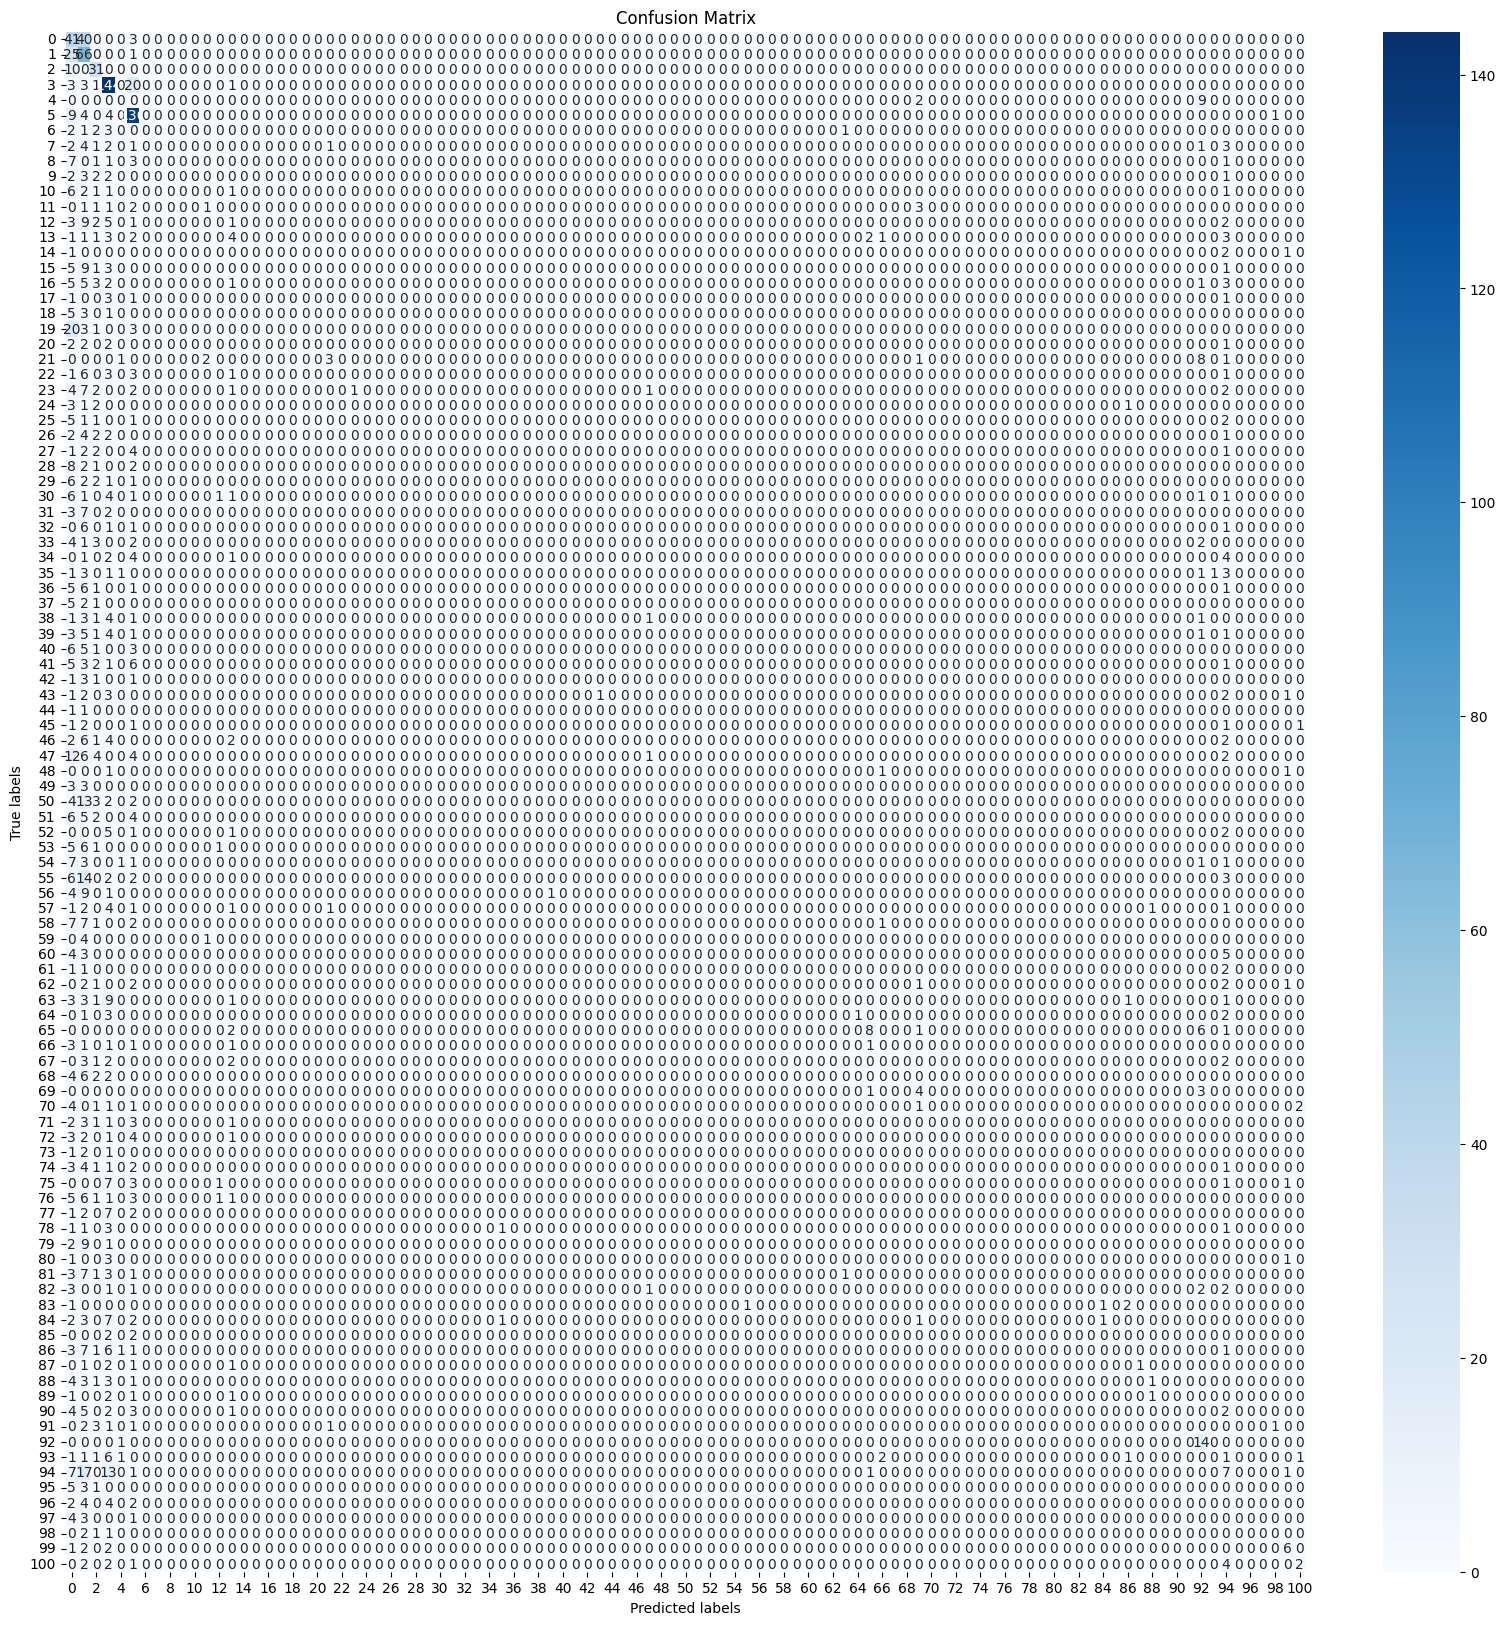

In [73]:
import seaborn as sns
cm = confusion_matrix(y_test, y_test_ovo_pred)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

# Yêu cầu 4:
## Áp dụng thuật toán SVC (với tham số C=1):
### Sử dụng chiến lược 1 vs rest:
* Tính Accuracy cho tập test
* Tính số support vector
* Tính và hiển thị ma trận Confusion

In [74]:
svc_one_vs_rest = SVC(C=1, decision_function_shape='ovr')

In [75]:
svc_one_vs_rest.fit(x_train, y_train)

SVC(C=1)

In [76]:
y_test_ovr_pred = svc_one_vs_rest.predict(x_test)

In [77]:
print(f'Accuracy in test: {accuracy_score(y_test_ovr_pred, y_test)}')

Accuracy in test: 0.2730414746543779


In [78]:
print("So support vector la: ",svc_one_vs_rest.support_vectors_.shape[0])

So support vector la:  4832


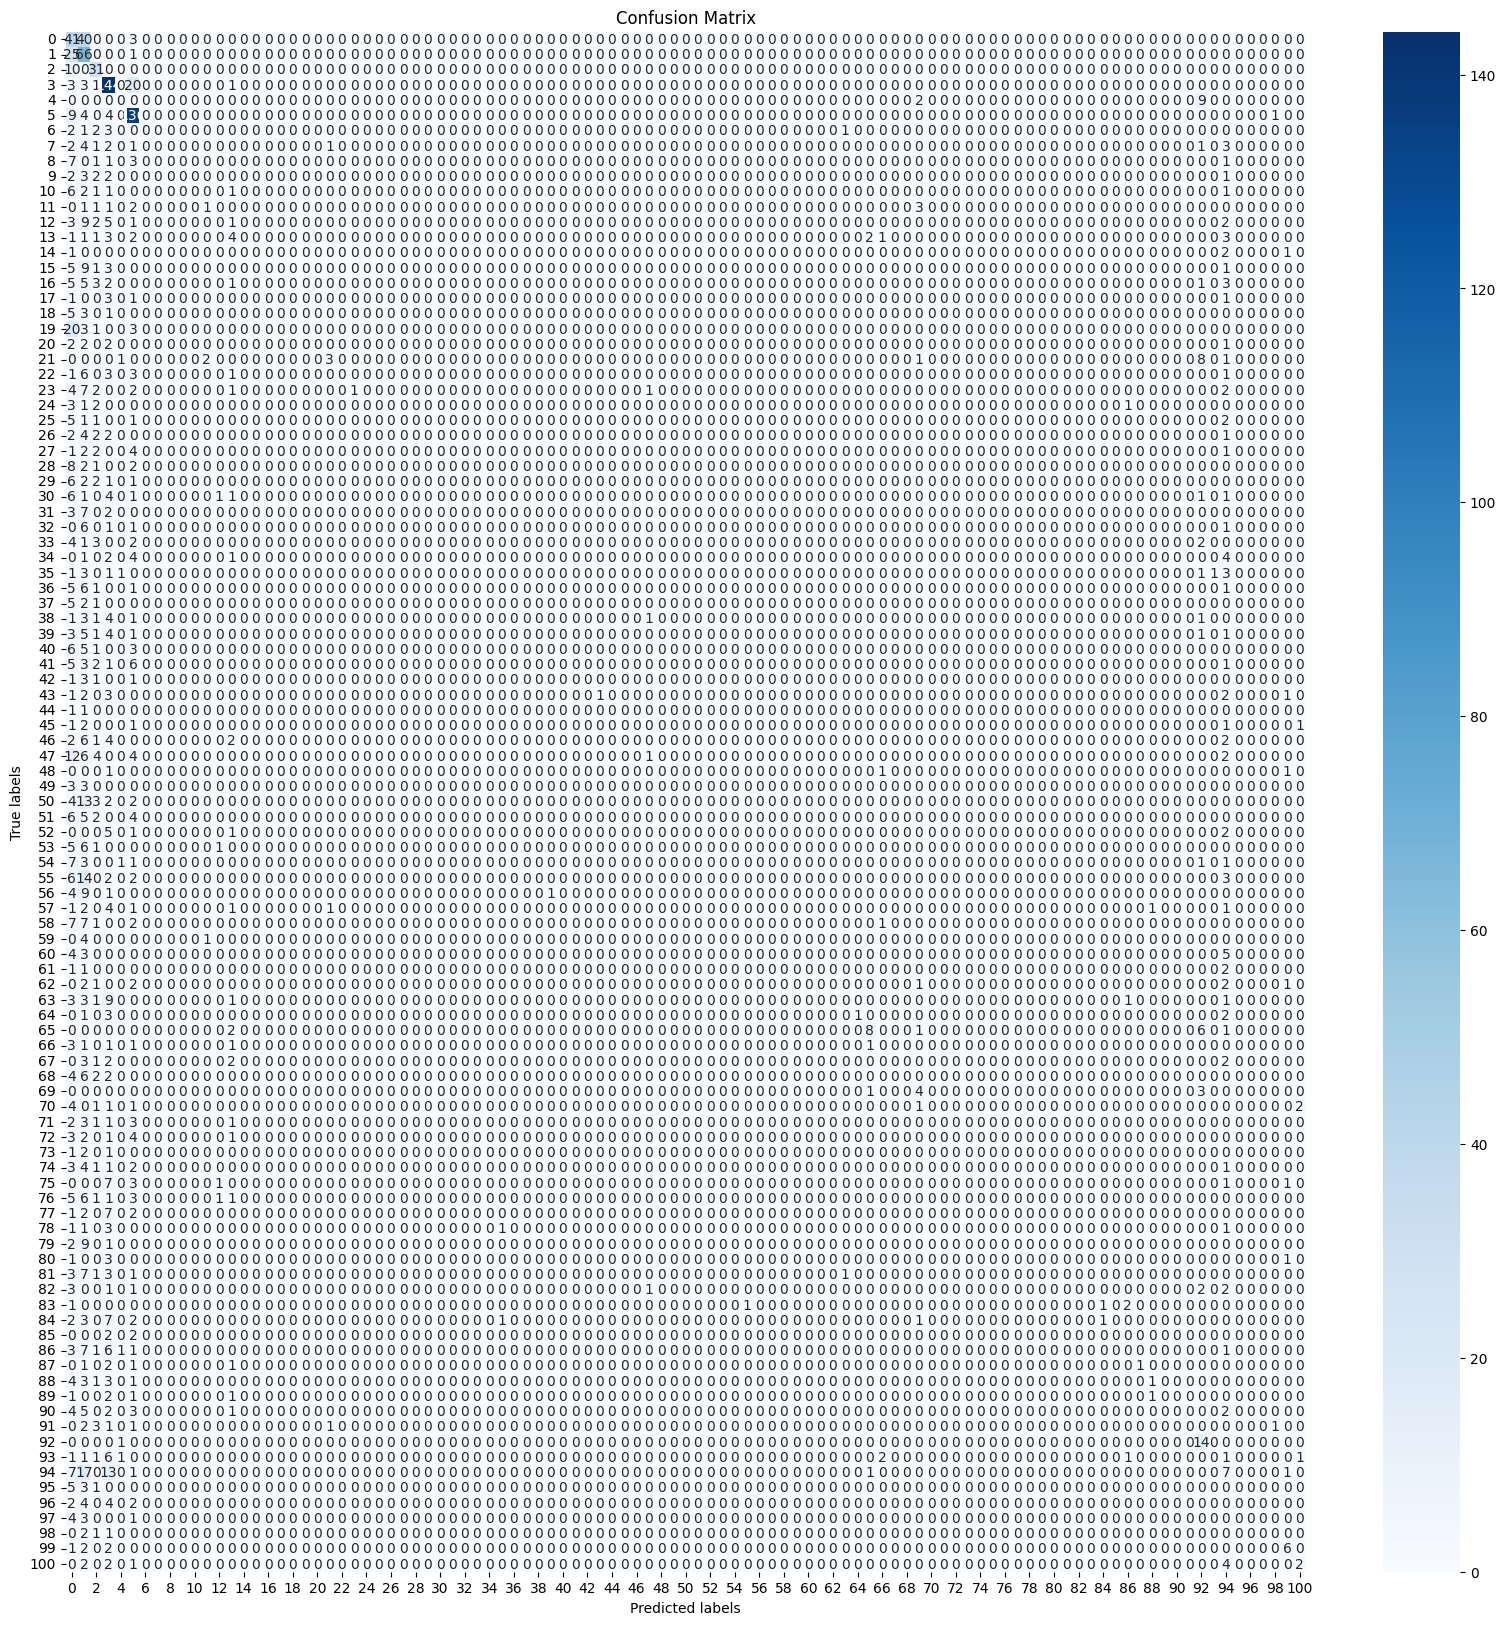

In [79]:
cm = confusion_matrix(y_test, y_test_ovr_pred)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

# Yêu cầu 5:
## Áp dụng thuật toán SVC: Xác định giá trị tham số C để đạt được Accuracy tốt nhất.

In [81]:
best_score_test = 0
best_k_test = 0
for i in range(1,101):
    svc = SVC(C=i)
    svc.fit(x_train, y_train)
    y_test_pred = svc.predict(x_test)
    score = accuracy_score(y_test_pred, y_test)

    if score > best_score_test:
        best_score_test = score
        best_k_test = i
    print(f'SVC with C={i}:')
    print(f'        accuracy in test: {score}')
print(f"Best score in test = {best_score_test} with C = {best_k_test}")

SVC with C=1:
        accuracy in test: 0.2730414746543779
SVC with C=2:
        accuracy in test: 0.2805299539170507
SVC with C=3:
        accuracy in test: 0.2816820276497696
SVC with C=4:
        accuracy in test: 0.2862903225806452
SVC with C=5:
        accuracy in test: 0.2891705069124424
SVC with C=6:
        accuracy in test: 0.2897465437788018
SVC with C=7:
        accuracy in test: 0.2897465437788018
SVC with C=8:
        accuracy in test: 0.29205069124423966
SVC with C=9:
        accuracy in test: 0.2932027649769585
SVC with C=10:
        accuracy in test: 0.2932027649769585
SVC with C=11:
        accuracy in test: 0.2978110599078341
SVC with C=12:
        accuracy in test: 0.29723502304147464
SVC with C=13:
        accuracy in test: 0.30069124423963134
SVC with C=14:
        accuracy in test: 0.30069124423963134
SVC with C=15:
        accuracy in test: 0.3001152073732719
SVC with C=16:
        accuracy in test: 0.3001152073732719
SVC with C=17:
        accuracy in test: 0.30